In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('cardio_train.csv',sep=";")

In [2]:
#For showing row and column
print("Loaded shape:",df.shape)

Loaded shape: (70000, 13)


In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
#Drop Redundant Column: The id column is a unique identifier and adds no predictive value, so you should remove it.
#axis=0 → operate on rows
#axis=1 → operate on columns
df.drop('id',axis=1,inplace=True)

In [5]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
#Convert Age: from days to years
# We use integer division or casting to get the age in full years.
#age column amj rese we just add age_years
df['age_years'] = (df['age'] / 365.25).astype(int)

In [7]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,52
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,61
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61


In [8]:
# Drop the original 'age' column (in days) now that we have 'age_years'
df = df.drop('age', axis=1)

In [9]:
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,1,165,64.0,130,70,3,1,0,0,0,1,51
3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,1,156,56.0,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,168,76.0,120,80,1,1,1,0,1,0,52
69996,1,158,126.0,140,90,2,2,0,0,1,1,61
69997,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,1,163,72.0,135,80,1,2,0,0,0,1,61


In [10]:
#Create BMI Feature for feature reduction (Dimensionality Reduction)
#Convert height from cm to meters (height / 100)
df['height_m'] = df['height'] / 100

In [11]:
#Calculate BMI
df['bmi'] = df['weight']/(df['height_m']**2)

In [12]:
df = df.drop('height_m', axis=1)

In [13]:
#Demo
print("\nBMI creation successful. Displaying first 5 BMI values:")
print(df[['weight', 'height', 'bmi']].head())


BMI creation successful. Displaying first 5 BMI values:
   weight  height        bmi
0    62.0     168  21.967120
1    85.0     156  34.927679
2    64.0     165  23.507805
3    82.0     169  28.710479
4    56.0     156  23.011177


In [14]:
print("Feature Engineering Summary:")
print(df.info())

Feature Engineering Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       70000 non-null  int64  
 1   height       70000 non-null  int64  
 2   weight       70000 non-null  float64
 3   ap_hi        70000 non-null  int64  
 4   ap_lo        70000 non-null  int64  
 5   cholesterol  70000 non-null  int64  
 6   gluc         70000 non-null  int64  
 7   smoke        70000 non-null  int64  
 8   alco         70000 non-null  int64  
 9   active       70000 non-null  int64  
 10  cardio       70000 non-null  int64  
 11  age_years    70000 non-null  int32  
 12  bmi          70000 non-null  float64
dtypes: float64(2), int32(1), int64(10)
memory usage: 6.7 MB
None


In [15]:
# --- Assuming 'df' is your DataFrame after initial cleanup (BMI/age_years created) ---
# Remove rows where Diastolic BP(ap_lo)> Systolic BP(ap_hi) (impossible)
original_rows = df.shape[0]
original_rows

70000

In [16]:
#Handling Blood Pressure Outliers
df = df[df['ap_lo'] < df['ap_hi']]

In [17]:
# | BP Type               | Minimum | Maximum | Why?                                                    |
# | --------------------- | ------- | ------- | ------------------------------------------------------- |
# | **Diastolic (ap_lo)** | 40      | 140     | below 40 = error, above 140 = extremely rare/impossible |
# | **Systolic (ap_hi)**  | 70      | 240     | below 70 = error, above 240 = extremely abnormal        |

In [29]:
# 2. Remove records with extreme low and high BP values based on reasonable clinical ranges.
# Minimum reasonable diastolic pressure (e.g., >= 40)
# Minimum reasonable systolic pressure (e.g., >= 70)
# Maximum reasonable diastolic pressure (e.g., <= 140)
# Maximum reasonable systolic pressure (e.g., <= 240)
df = df[
    (df['ap_lo'] >= 40) & (df['ap_lo'] <= 140) &
    (df['ap_hi'] >= 70) & (df['ap_hi'] <= 240)
]

In [30]:
rows_removed = original_rows - df.shape[0]

In [31]:
print(f"Total records before cleaning: {original_rows}")
print(f"Total records removed due to BP anomalies: {rows_removed}")
print(f"Total records remaining: {df.shape[0]}")

Total records before cleaning: 70000
Total records removed due to BP anomalies: 1336
Total records remaining: 68664


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Prepare Features (X) and Target (y) ---
X = df.drop('cardio', axis=1) # All columns except the target
y = df['cardio']             # The target variable

# --- Split the Data ---
# Split the data into training (80%) and testing (20%) sets
# random_state=42 ensures reproducibility
# stratify=y ensures the ratio of 'cardio' (0/1) is the same in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Identify Numerical Columns to Scale ---
# We exclude the binary/categorical columns that are already 0/1 or 1/2/3
# Scaling = converting different-sized numbers into a similar range so the machine learning model learns correctly and fairly
#scaling karva nu karan e ke a column ni value ma jaju veration hoi to eg amuk valu to large and some are to small so we need to make in a 
#normal way or convert into samll value 
numerical_cols = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']


#This scaler converts values to:
# z = (x-mean)/standard deviation
scaler = StandardScaler()

# FIT the scaler ONLY on the training data (X_train)
#X_train[numerical_cols] means:age_years height	weight	ap_hi	ap_lo	bmi
#fit() → learn
#transform() → apply
#fit_transform() → learn + apply
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# TRANSFORM the testing data (X_test) using the parameters learned from the training data
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Data Scaling and Train/Test Split are complete!")
print(f"Final shape of Training Data: {X_train.shape}")

Data Scaling and Train/Test Split are complete!
Final shape of Training Data: (54931, 12)


In [33]:
#Week three

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Note: Ensure you have run Week 2 code and defined X_train, y_train, etc.

class CustomLogisticRegression:
    """
    Logistic Regression implementation using NumPy for matrix operations.
    Follows the principle of implementing core math from scratch.
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        # Hyperparameters
        self.lr = learning_rate
        self.n_iters = n_iterations
        
        # Model parameters (Weights and Bias)
        self.weights = None
        self.bias = None
        
        # List to store cost history
        self.cost_history = []

    def _sigmoid(self, z):
        """Sigmoid activation function."""
        # [Image of Sigmoid function curve]
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """Trains the model using Gradient Descent."""
        # m = number of samples, n = number of features
        m, n = X.shape
        
        # Initialize weights to zero and bias to zero
        self.weights = np.zeros(n)
        self.bias = 0
        
        # Convert y (target) to a NumPy array for consistent matrix operations
        # We need it as a column vector for dot products, hence reshape
        y_reshaped = y.values.reshape(-1, 1)

        # Gradient Descent Loop
        for i in range(self.n_iters):
            
            # --- 1. Forward Propagation ---
            # Linear model: z = X * w + b
            linear_model = np.dot(X, self.weights) + self.bias
            
            # Prediction (h) is the probability via Sigmoid
            h = self._sigmoid(linear_model)
            
            # --- 2. Cost Function (Binary Cross-Entropy Loss) ---
            # J = (1/m) * sum(-y * log(h) - (1 - y) * log(1 - h))
            cost = (1 / m) * np.sum(-y_reshaped.T * np.log(h) - (1 - y_reshaped.T) * np.log(1 - h))
            self.cost_history.append(cost)
            
            # --- 3. Backward Propagation (Calculating the Gradients) ---
            # Error calculation (difference between prediction and actual)
            error = h.reshape(-1, 1) - y_reshaped
            
            # Gradient of weights (dw) and bias (db)
            dw = (1 / m) * np.dot(X.T, error)
            db = (1 / m) * np.sum(error)
            
            # --- 4. Update Parameters (Gradient Descent Step) ---
            # Update Rule: w := w - learning_rate * dw
            self.weights -= self.lr * dw.flatten() # .flatten() converts column vector back to 1D array
            self.bias -= self.lr * db
            
            # Optional print statement for monitoring
            if i % 100 == 0:
                print(f"Iteration {i}: Cost = {cost:.4f}")

        print("Training complete.")

    def predict(self, X):
        """Generates binary predictions (0 or 1)."""
        # Calculate the linear model (z)
        linear_model = np.dot(X, self.weights) + self.bias
        
        # Get the probability (h) via Sigmoid
        y_predicted_proba = self._sigmoid(linear_model)
        
        # Convert probabilities to binary prediction (Decision boundary at 0.5)
        y_predicted = np.where(y_predicted_proba >= 0.5, 1, 0)
        
        return y_predicted

In [44]:
# --- Training the Custom Model ---

# Ensure X_train and X_test are NumPy arrays for the class methods
# This is required because the custom model uses np.dot(), which works best with NumPy arrays.
X_train_arr = X_train.values 
X_test_arr = X_test.values

# Initialize and train the model
print("--- Starting Model Training ---")
# Use the class definition you just pasted. Increased iterations for better convergence.
model = CustomLogisticRegression(learning_rate=0.01, n_iterations=3000) 
model.fit(X_train_arr, y_train)

# Generate predictions on the unseen test set
# The result is stored in 'y_pred', resolving the NameError.
y_pred = model.predict(X_test_arr)

print("\nModel trained and predictions generated successfully!")

--- Starting Model Training ---
Iteration 0: Cost = 0.6931
Iteration 100: Cost = 0.6249
Iteration 200: Cost = 0.5976
Iteration 300: Cost = 0.5847
Iteration 400: Cost = 0.5776
Iteration 500: Cost = 0.5734
Iteration 600: Cost = 0.5706
Iteration 700: Cost = 0.5687
Iteration 800: Cost = 0.5673
Iteration 900: Cost = 0.5663
Iteration 1000: Cost = 0.5654
Iteration 1100: Cost = 0.5648
Iteration 1200: Cost = 0.5642
Iteration 1300: Cost = 0.5637
Iteration 1400: Cost = 0.5633
Iteration 1500: Cost = 0.5629
Iteration 1600: Cost = 0.5626
Iteration 1700: Cost = 0.5623
Iteration 1800: Cost = 0.5620
Iteration 1900: Cost = 0.5618
Iteration 2000: Cost = 0.5616
Iteration 2100: Cost = 0.5614
Iteration 2200: Cost = 0.5612
Iteration 2300: Cost = 0.5610
Iteration 2400: Cost = 0.5609
Iteration 2500: Cost = 0.5608
Iteration 2600: Cost = 0.5606
Iteration 2700: Cost = 0.5605
Iteration 2800: Cost = 0.5604
Iteration 2900: Cost = 0.5603
Training complete.

Model trained and predictions generated successfully!



          Custom Logistic Regression Results           
Total Test Samples: 13733
Final Accuracy: 0.7210

--- Confusion Matrix Counts ---
True Positives (TP): 4549
True Negatives (TN): 5352
False Positives (FP): 1588
False Negatives (FN): 2244

--- Classification Report ---
Precision: 0.7412
Recall (Sensitivity): 0.6697
Specificity: 0.7712
F1-Score: 0.7036


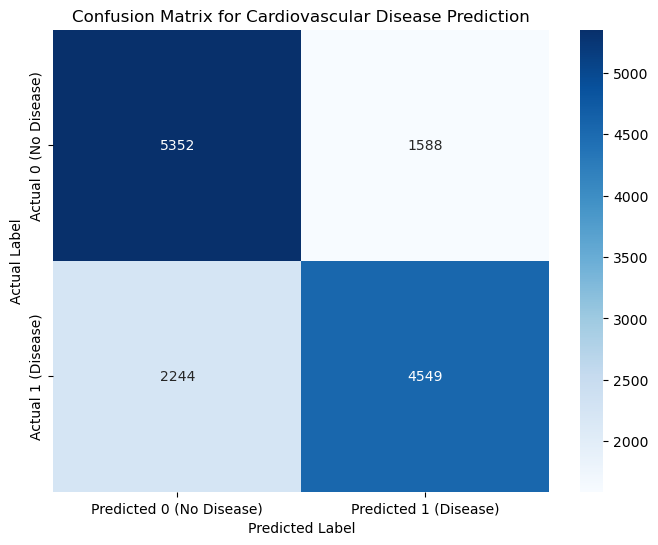

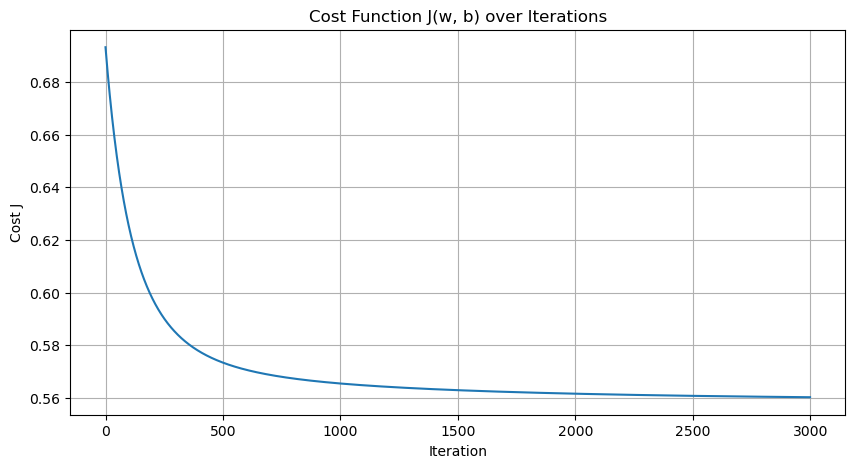

In [45]:
# --- 1. Preparation for Evaluation ---
y_test_arr = y_test.values

# --- 2. Calculate Core Components: TP, TN, FP, FN ---
TP = np.sum((y_pred == 1) & (y_test_arr == 1))
TN = np.sum((y_pred == 0) & (y_test_arr == 0))
FP = np.sum((y_pred == 1) & (y_test_arr == 0))
FN = np.sum((y_pred == 0) & (y_test_arr == 1))

# --- 3. Calculate Metrics ---
accuracy = (TP + TN) / len(y_test_arr)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

# --- 4. Print Structured Results ---
print("\n=======================================================")
print("          Custom Logistic Regression Results           ")
print("=======================================================")

print(f"Total Test Samples: {len(y_test_arr)}")
print(f"Final Accuracy: {accuracy:.4f}")

print("\n--- Confusion Matrix Counts ---")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

print("\n--- Classification Report ---")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print("=======================================================")

# --- 5. Visualize the Confusion Matrix ---
conf_matrix = np.array([[TN, FP], [FN, TP]])

plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=['Predicted 0 (No Disease)', 'Predicted 1 (Disease)'],
    yticklabels=['Actual 0 (No Disease)', 'Actual 1 (Disease)']
)
plt.title('Confusion Matrix for Cardiovascular Disease Prediction')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# --- 6. Plot Cost History (Optional but great for analysis) ---
plt.figure(figsize=(10, 5))
plt.plot(range(model.n_iters), model.cost_history)
plt.title('Cost Function J(w, b) over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost J')
plt.grid(True)
plt.show()

In [46]:
import pickle
import numpy as np 
# Assuming 'model' is your trained CustomLogisticRegression object 
# and 'scaler' is your StandardScaler object from Week 2

# Save the learned weights and bias
with open('custom_model_params.pkl', 'wb') as f:
    pickle.dump({
        'weights': model.weights,
        'bias': model.bias
    }, f)

# Save the scaler object (contains mean and std dev)
with open('scaler_params.pkl', 'wb') as f:
    pickle.dump(scaler, f)